# IUCN - Extinct species
<a href="https://app.naas.ai/user-redirect/naas/downloader?url=https://raw.githubusercontent.com/jupyter-naas/awesome-notebooks/master/IUCN/IUCN_Extinct_species.ipynb" target="_parent">
<img src="https://img.shields.io/badge/-Open%20in%20Naas-success?labelColor=000000&logo="/>
</a>

Source : https://www.iucnredlist.org/statistics

If you want another view of the data : Link : https://ourworldindata.org/extinctions

## Input

### History
The initial aim was to compare the number of threatened species per species over time (e.g. number of pandas per year).

After a lot of research, it turns out that this kind of data is not available or it is only data from one year (2015 or 2018).

Therefore, we decided to start another project: Number of threatened species per year, with details by category using data from this site : https://www.iucnredlist.org/resources/summary-statistics#Summary%20Tables

So we took the pdf from this site and turned it into a csv.
But the data was heavy and not easy to use. Moreover, we thought that this would not necessarily be viable and adaptable over time.

So we decided to take another datasource on a similar subject : *Extinct Species*, from this website : https://www.iucnredlist.org/statistics

### Test with 'read_html' 
We couldn't use it cause there's too many tabs in the page (it'll take too long).

In [3]:
import pandas as pd

url = "https://www.iucnredlist.org/statistics"

#dfs = pd.read_html(url)
#df = dfs[0]

#df

### We use CSV file
CSV button on this link to download the file: https://www.iucnredlist.org/statistics

In [5]:
# We load the csv file (must be root)
data = pd.read_csv('Table 3 Species by kingdom and class - show all.csv',',')
# We set the column Name as index
data.set_index('Name', inplace = True)
# Then we select the columns EX, EW and Name, and all the lines we want in the graph
table = data.loc[["Total",
                  "GASTROPODA",
                  "BIVALVIA",
                  "AVES",
                  "MAMMALIA",
                  "ACTINOPTERYGII",
                  "CEPHALASPIDOMORPHI",
                  "INSECTA",
                  "AMPHIBIA",
                  "REPTILIA",
                  "ARACHNIDA",
                  "CLITELLATA",
                  "DIPLOPODA",
                  "ENOPLA",
                  "TURBELLARIA",
                 "MALACOSTRACA",
                 "MAXILLOPODA",
                 "OSTRACODA"]# add species here
                 ,"EX":"EW"]
table

,EX,EW
Name,,
Total,900,79
GASTROPODA,267,14
BIVALVIA,32,0
AVES,159,5
MAMMALIA,85,2
ACTINOPTERYGII,79,10
CEPHALASPIDOMORPHI,1,0
INSECTA,63,1
AMPHIBIA,35,2


In [6]:
# We add a new column 'CATEGORY' to our Dataframe
table["CATEGORY"] = ["Total",
                     "Molluscs",
                     "Molluscs",
                     "Birds",
                     "Mammals",
                     "Fishes",
                     "Fishes",
                     "Insects",
                     "Amphibians",
                     "Reptiles",
                      "Others",
                      "Others",
                      "Others",
                      "Others",
                      "Others",
                    "Crustaceans",
                    "Crustaceans",
                    "Crustaceans"]
table = table.loc[:,["CATEGORY","EX"]] # we drop the column "EW"
table
# ---NOTE : If you want to add new species, you have to also add his category

,CATEGORY,EX
Name,,
Total,Total,900
GASTROPODA,Molluscs,267
BIVALVIA,Molluscs,32
AVES,Birds,159
MAMMALIA,Mammals,85
ACTINOPTERYGII,Fishes,79
CEPHALASPIDOMORPHI,Fishes,1
INSECTA,Insects,63
AMPHIBIA,Amphibians,35


In [7]:
# We groupby CATEGORIES :
table.reset_index(drop=True, inplace=True)
table = table.groupby(['CATEGORY']).sum().reset_index()
table.rename(columns = {'EX':'Extincted'}, inplace=True)
table

,CATEGORY,Extincted
0,Amphibians,35
1,Birds,159
2,Crustaceans,11
3,Fishes,80
4,Insects,63
5,Mammals,85
6,Molluscs,299
7,Others,16
8,Reptiles,30
9,Total,900


## Output

### Graph

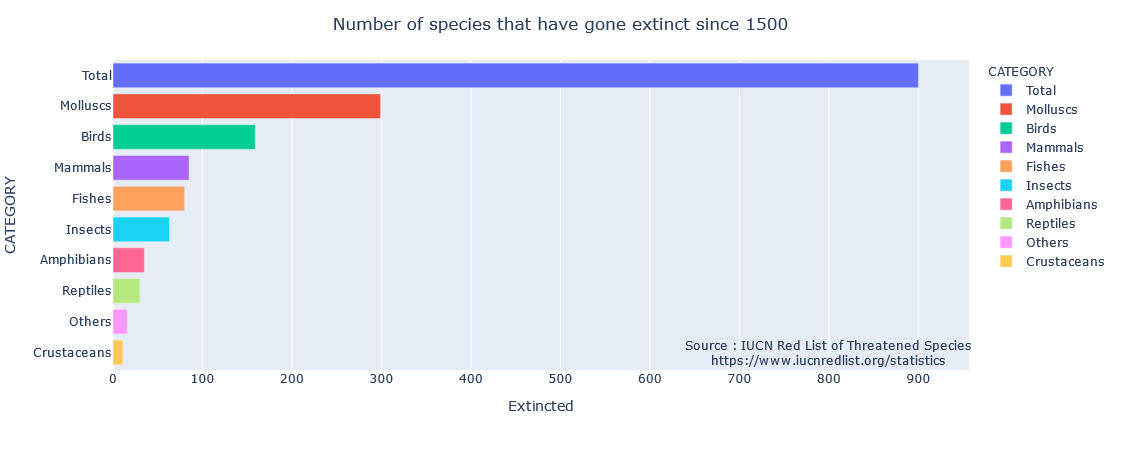

In [30]:
# We use plotly to show datas with an horizontal bar chart
import plotly.express as px

def print_graph():
    Graph = table.sort_values('Extincted', ascending=False)
    fig = px.bar(Graph, x="Extincted", y="CATEGORY", color="CATEGORY", orientation="h")
    fig.update_layout(title_text = "Number of species that have gone extinct since 1500", title_x = 0.5)
    fig.add_annotation(x=800, y=0,text="Source : IUCN Red List of Threatened Species<br>https://www.iucnredlist.org/statistics",showarrow=False)
    fig.show()
    
print_graph()

### Links that we found during the course 

- https://donnees.banquemondiale.org/indicator/EN.MAM.THRD.NO (only 2018)

- https://www.eea.europa.eu/data-and-maps/data/european-red-lists-4/european-red-list/european-red-list-csv-files/view (old Dataset, last upload was in 2015)

- https://www.worldwildlife.org/species/directory?page=2 (the years are not available)

- https://www.worldwildlife.org/pages/conservation-science-data-and-tools (apart from the case)

- https://databasin.org/datasets/68635d7c77f1475f9b6c1d1dbe0a4c4c/ (we can't use it)

- https://gisandscience.com/2009/12/01/download-datasets-from-the-world-wildlife-funds-conservation-science-program/ (no datas about threatened species)

- https://data.world/datasets/tiger (only about tigers but there are no datas usefull)